In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk, re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
%matplotlib inline

In [2]:
data = pd.read_csv(r'D:\Data Science\NLP\Fake-News-Classifier-master\Fake-News-Classifier-master\fake-news\test.csv')
data_label = pd.read_csv(r'D:\Data Science\NLP\Fake-News-Classifier-master\Fake-News-Classifier-master\fake-news\submit.csv')

data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [3]:
data_label.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [4]:
data_label.set_index('id', inplace = True)

data_label.head()

,label
id,
20800,0
20801,1
20802,0
20803,1
20804,1


In [5]:
data['label'] = data['id'].map(data_label['label'])
data.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [6]:
data.isnull().sum()

id          0
title     122
author    503
text        7
label       0
dtype: int64

In [7]:
data.dropna(inplace = True)

data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
data.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1


In [9]:
data = data.reset_index()

data.head()

,index,id,title,author,text,label
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1


In [10]:
corpus = []
lemmatize = WordNetLemmatizer()

for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatize.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
corpus[2: 10]

['tim tebow attempt another comeback time baseball new york time',
 'keiser report meme war e',
 'pelosi call fbi investigation find russian donald trump breitbart',
 'weekly featured profile randy shannon',
 'u general admiral endorse trump commander chief',
 'working class hero john brennon',
 'rise mandatory vaccination mean end medical freedom',
 'communist terrorize small business']

## Convert the data to Vectors using TFIDF

In [12]:
cv = TfidfVectorizer(ngram_range = (1,4), max_features = 5000)
X = cv.fit_transform(corpus).toarray()

y = data['label']

In [13]:
X.shape

(4575, 5000)

In [14]:
y.shape

(4575,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
print(" X_train : {}\n y_train : {}\n X_test : {} \n y_test : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

 X_train : (3660, 5000)
 y_train : (3660,)
 X_test : (915, 5000) 
 y_test : (915,)


In [17]:
cv.get_feature_names()[:20]

['aaron',
 'abandoning',
 'abbas',
 'abby',
 'abby martin',
 'abby martin expose',
 'abc',
 'abe',
 'abedin',
 'abedin email',
 'abortion',
 'abrams',
 'abroad',
 'abroad new',
 'abroad new york',
 'abroad new york time',
 'absolutely',
 'abuse',
 'abuser',
 'academy']

In [18]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 4),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

Accuracy :  0.7453551912568306
 Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       420
           1       0.76      0.78      0.77       495

    accuracy                           0.75       915
   macro avg       0.74      0.74      0.74       915
weighted avg       0.74      0.75      0.75       915



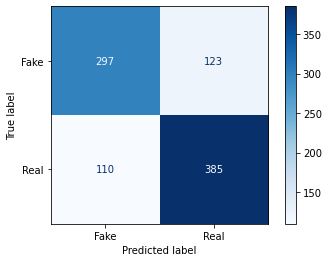

In [19]:
fake_news_classifier = MultinomialNB()
fake_news_classifier.fit(X_train, y_train)
predictions_NB = fake_news_classifier.predict(X_test)

cm_NB = confusion_matrix(y_test, predictions_NB)
accuracy_score_NB = accuracy_score(y_test, predictions_NB)
cr = classification_report(y_test, predictions_NB)
plot_confusion_matrix(fake_news_classifier, X_test, y_test, display_labels = ['Fake', 'Real'], cmap = plt.cm.Blues)

print("Accuracy : ", accuracy_score_NB)
print(" Classification Report : \n", cr)

Accuracy :  0.7672131147540984
 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.60      0.70       420
           1       0.73      0.91      0.81       495

    accuracy                           0.77       915
   macro avg       0.79      0.75      0.76       915
weighted avg       0.78      0.77      0.76       915



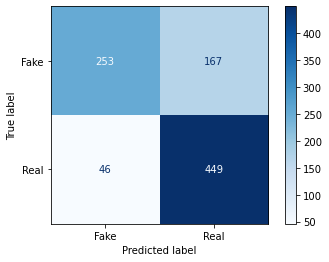

In [20]:
fake_news_classifier_Pass_aggr_model = PassiveAggressiveClassifier(max_iter = 200, n_jobs = -1, C = 0.001)
fake_news_classifier_Pass_aggr_model.fit(X_train, y_train)
predictions_PA = fake_news_classifier_Pass_aggr_model.predict(X_test)

cm_PA = confusion_matrix(y_test, predictions_PA)
accuracy_score_PA = accuracy_score(y_test, predictions_PA)
cr_PA = classification_report(y_test, predictions_PA)
plot_confusion_matrix(fake_news_classifier_Pass_aggr_model, X_test, y_test, display_labels = ['Fake', 'Real'], cmap = plt.cm.Blues)

print("Accuracy : ", accuracy_score_PA)
print(" Classification Report : \n", cr_PA)